In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Loading

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0,X_test/255.0
print(X_train.shape)

(60000, 28, 28)


In [7]:
# Conv layer expects: HxWxC
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
print(X_train.shape)

(60000, 28, 28, 1)


In [15]:
num_class = len(set(y_train))
print('Number of classes for fashion MNIST: {}'.format(len(set(y_train))))

Number of classes for fashion MNIST: 10


## Model

In [0]:
i  = Input(shape=X_train[0].shape)
x = Conv2D(32,kernel_size=(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,kernel_size=(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,kernel_size=(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_class,activation='softmax')(x)

model = Model(i,x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5185 - accuracy: 0.8075 - val_loss: 0.4107 - val_accuracy: 0.8387
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3641 - accuracy: 0.8627 - val_loss: 0.3543 - val_accuracy: 0.8696
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3175 - accuracy: 0.8799 - val_loss: 0.3254 - val_accuracy: 0.8809
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2841 - accuracy: 0.8920 - val_loss: 0.3039 - val_accuracy: 0.8888
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2575 - accuracy: 0.9016 - val_loss: 0.3047 - val_accuracy: 0.8891
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2340 - accuracy: 0.9105 - val_loss: 0.2927 - val_accuracy: 0.8945
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2172 - accuracy: 0.9175 - val_loss: 0.2929 -

## Model Evaluate

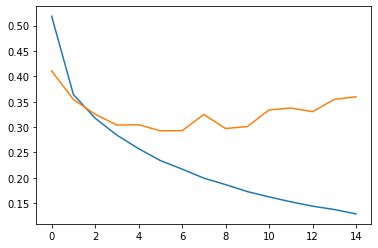

In [19]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')

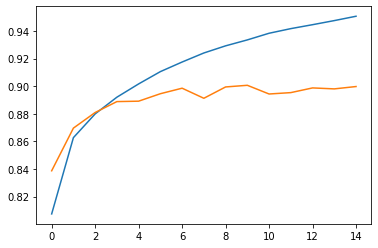

In [20]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')

In [24]:
pred = model.predict(X_test).argmax(axis=1)
print(confusion_matrix(y_test,pred))

[[847   0  21  21   3   2 103   0   3   0]
 [  2 974   1  14   2   0   5   0   2   0]
 [ 13   0 853  13  72   1  47   0   1   0]
 [ 12   5  21 911  28   0  22   0   1   0]
 [  1   1  49  28 867   0  53   0   1   0]
 [  0   0   0   2   0 982   0   7   1   8]
 [108   0  70  28 103   0 682   0   9   0]
 [  0   0   0   0   0  22   0 957   0  21]
 [  1   0   3   3   4   5   6   1 975   2]
 [  1   0   0   0   0   9   0  40   1 949]]


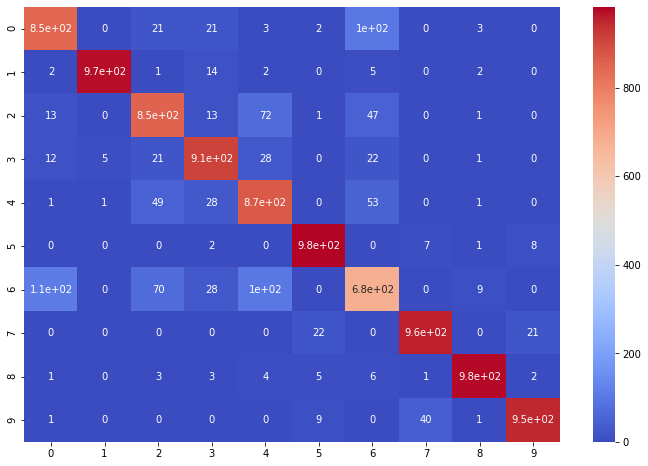

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.85      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.80      0.87      0.83      1000
           5       0.96      0.98      0.97      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Text(0.5, 1.0, 'True label: 3 Predicted label: 4')

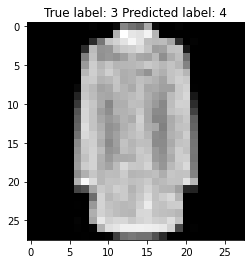

In [34]:
miss_class_idx = np.where(pred != y_test)[0]
i = np.random.choice(miss_class_idx)
plt.imshow(X_test[i].reshape(28,28),cmap='gray')
plt.title("True label: {t} Predicted label: {p}".format(t=y_test[i],p=pred[i]))